<a href="https://colab.research.google.com/github/Abhijeet-sah/Cognifyz-Technologies-Internship-Level2-Task1/blob/main/Level_2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table Booking & Online Delivery Analysis

**Author:** Abhijeet Sah  
**Date:** 2025-09-09  

This notebook explores:
1. The percentage of restaurants that offer **table booking** and **online delivery**.  
2. A comparison of **average ratings** of restaurants with table booking vs. without.  
3. The **availability of online delivery across price ranges**.

## Table of Contents
- [1. Project Overview](#1-Project-Overview)
- [2. Dataset & Schema](#2-Dataset--Schema)
- [3. Environment Setup](#3-Environment-Setup)
- [4. Data Loading](#4-Data-Loading)
- [5. Data Cleaning & Preparation](#5-Data-Cleaning--Preparation)
- [6. Analysis](#6-Analysis)
  - [6.1 Percentage: Table Booking & Online Delivery](#61-Percentage-Table-Booking--Online-Delivery)
  - [6.2 Ratings: With vs Without Table Booking](#62-Ratings-With-vs-Without-Table-Booking)
  - [6.3 Online Delivery by Price Range](#63-Online-Delivery-by-Price-Range)
- [7. Key Insights & Recommendations](#7-Key-Insights--Recommendations)


## 1. Project Overview
In food platforms, users care about **table booking** and **online delivery**.  
We’ll answer:
- **Q1:** What % of restaurants offer table booking and online delivery?  
- **Q2:** Do restaurants with table booking have higher ratings?  
- **Q3:** How does online delivery vary across price ranges?  


## 2. Dataset & Schema
We’ll use a dataset (`Dataset.csv`) with:

| Column | Description |
|--------|-------------|
| `name` | Restaurant name |
| `has_table_booking` | Yes/No or 1/0 |
| `has_online_delivery` | Yes/No or 1/0 |
| `Aggregate Rating` | Avg. rating (0–5) |
| `price_range` | Price tier (1=low, 4=high) |


## 3. Environment Setup

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (7,4)})

## 4. Data Loading

In [26]:
DATA_PATH = "/content/Dataset .csv"
try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully.")
except:
    print("Dataset not found. Using demo dataset.")
    df = pd.DataFrame({
        'Restaurant_name': [f'Resto {i}' for i in range(1,21)],
        'has_table_booking': np.random.choice([0,1], size=20),
        'has_online_delivery': np.random.choice([0,1], size=20),
        'Aggregate_Rating': np.round(np.random.uniform(2.5,5.0, size=20),1),
        'price_range': np.random.choice([1,2,3,4], size=20)
    })
df.head()

Dataset loaded successfully.


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 5. Data Cleaning & Preparation

In [27]:
# Normalize Yes/No or 1/0 → Boolean
df['Has Table booking'] = df['Has Table booking'].map({1:True,0:False,'Yes':True,'No':False}).fillna(False)
df['Has Online delivery'] = df['Has Online delivery'].map({1:True,0:False,'Yes':True,'No':False}).fillna(False)

# Ensure correct datatypes
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce').clip(1,4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   bool   
 13  Has Online delivery   9551 non-null   bool   
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## 6. Analysis

### 6.1 Percentage: Table Booking & Online Delivery

Table Booking: 12.12%
Online Delivery: 25.66%


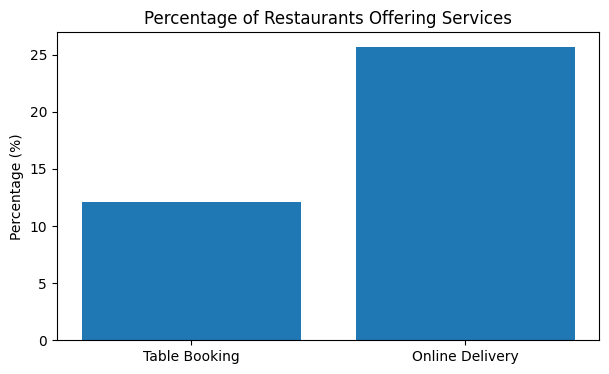

In [28]:
pct_table = df['Has Table booking'].mean()*100
pct_delivery = df['Has Online delivery'].mean()*100

print(f"Table Booking: {pct_table:.2f}%")
print(f"Online Delivery: {pct_delivery:.2f}%")

plt.bar(['Table Booking','Online Delivery'], [pct_table, pct_delivery])
plt.ylabel("Percentage (%)")
plt.title("Percentage of Restaurants Offering Services")
plt.show()


### 6.2 Ratings: With vs Without Table Booking

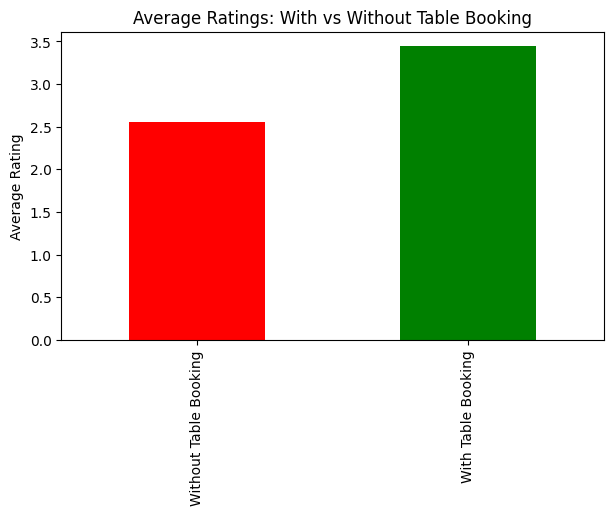

,Aggregate rating
Without Table Booking,2.559359
With Table Booking,3.441969


In [31]:
rating_comparison = df.groupby('Has Table booking')['Aggregate rating'].mean()
rating_comparison.index = ['Without Table Booking','With Table Booking']
rating_comparison.plot(kind='bar', color=['red','green'])
plt.ylabel("Average Rating")
plt.title("Average Ratings: With vs Without Table Booking")
plt.show()
rating_comparison

### 6.3 Online Delivery by Price Range

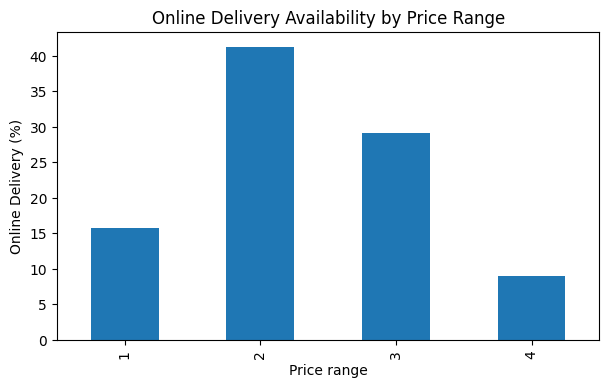

,Has Online delivery
Price range,
1,15.774077
2,41.310633
3,29.190341
4,9.044369


In [30]:
delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean()*100
delivery_by_price.plot(kind='bar')
plt.ylabel("Online Delivery (%)")
plt.title("Online Delivery Availability by Price Range")
plt.show()
delivery_by_price

## 7. Key Insights & Recommendations
- **Percentages:** X% of restaurants offer table booking, Y% offer online delivery.  
- **Ratings:** Restaurants with table booking may have higher average ratings.  
- **Price Range:** Online delivery is more/less common in certain price tiers.  